In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/train.csv', index_col='Id')
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns = df.columns.str.replace(' ' , '_')

In [6]:
df.head()

,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,...,p29,p30,p31,p32,p33,p34,p35,p36,p37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


## EDA

### Cities

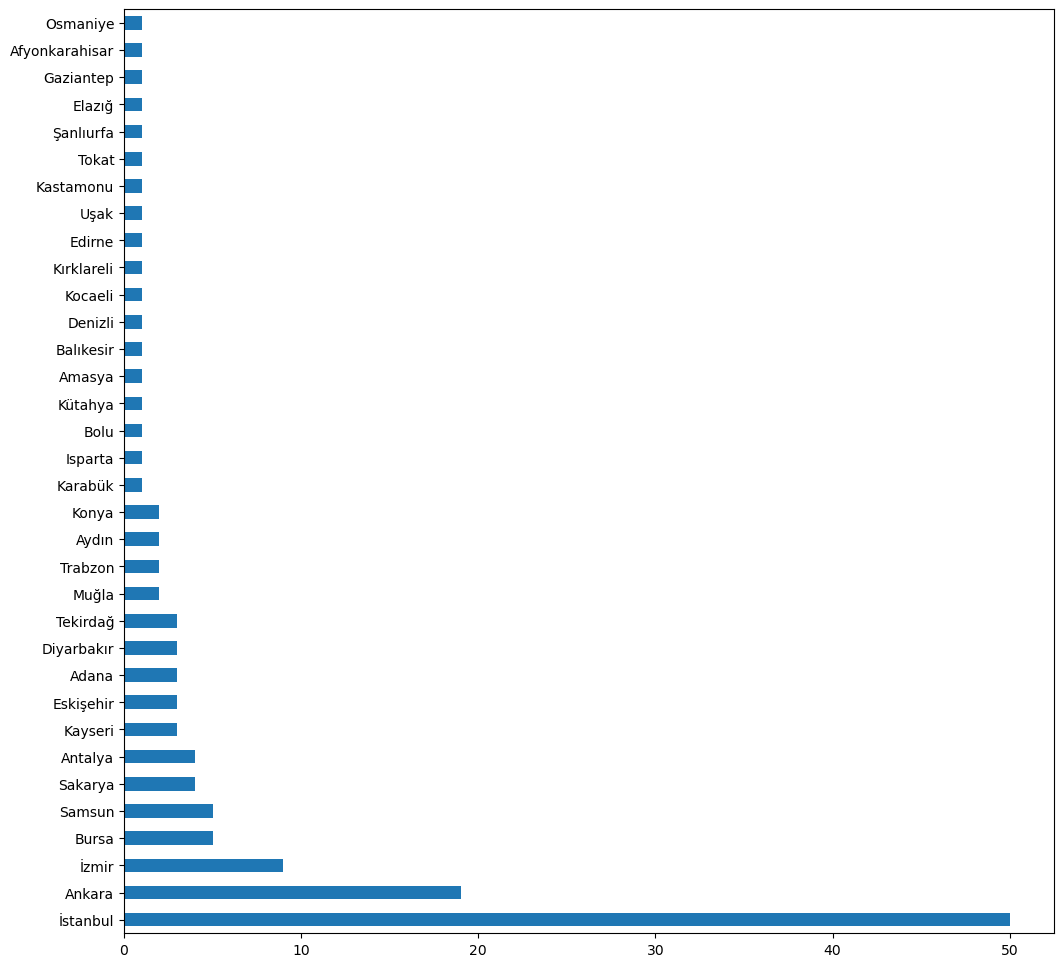

In [7]:
df['city'].value_counts().plot(kind='barh', figsize=(12,12));

In [8]:
df['city_group_fine'] = df['city'].map( lambda x : x if x in ['İstanbul','Ankara','İzmir'] else 'other')

<AxesSubplot: title={'center': 'City Group (Fine) Distribution'}>

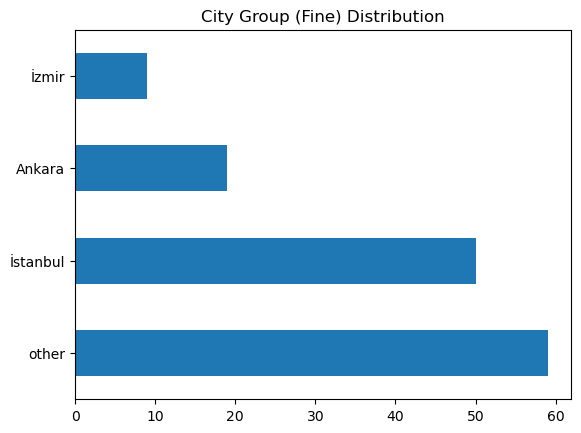

In [9]:
df['city_group_fine'].value_counts().plot(kind='barh', title='City Group (Fine) Distribution')

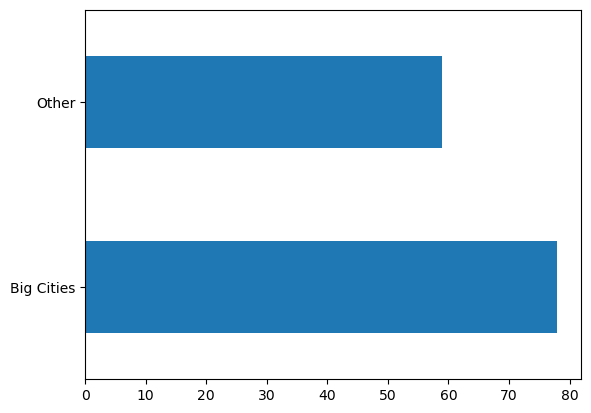

In [10]:
df['city_group'].value_counts().plot(kind='barh');

In [11]:
df[df['city_group']=='Big Cities'].groupby('city').agg('count')

,open_date,city_group,type,p1,p2,p3,p4,p5,p6,p7,...,p30,p31,p32,p33,p34,p35,p36,p37,revenue,city_group_fine
city,,,,,,,,,,,,,,,,,,,,,
Ankara,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
İstanbul,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
İzmir,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


So the "big cities" are just these three cities.

### Restaurant type

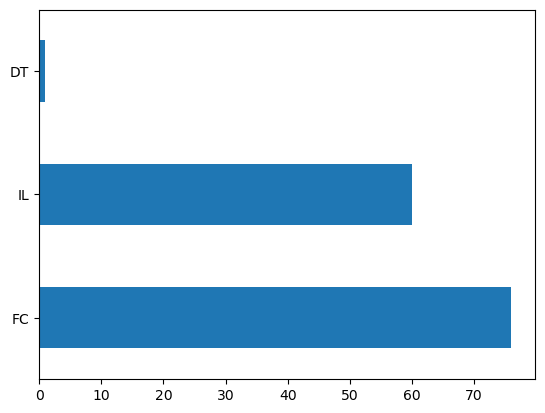

In [12]:
df['type'].value_counts().plot(kind='barh');

This means we don't have any "MB" (mobile) restaurants in our training data set.  Also, "DT" is not useful.  So we'll combine these all into an `is_inline` variable.

In [13]:
df['is_inline'] = df['type'].map(lambda x : 1 if x=='IL' else 0)
df = df.drop(columns='type')
df.head()

,open_date,city,city_group,p1,p2,p3,p4,p5,p6,p7,...,p31,p32,p33,p34,p35,p36,p37,revenue,city_group_fine,is_inline
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,4,5.0,4.0,4.0,2,2,5,...,3,4,5,5,4,3,4,5653753.0,İstanbul,1
1,02/14/2008,Ankara,Big Cities,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,6923131.0,Ankara,0
2,03/09/2013,Diyarbakır,Other,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,2055379.0,other,1
3,02/02/2012,Tokat,Other,6,4.5,6.0,6.0,4,4,10,...,12,10,6,18,12,12,6,2675511.0,other,1
4,05/09/2009,Gaziantep,Other,3,4.0,3.0,4.0,2,2,5,...,1,3,2,3,4,3,3,4316715.0,other,1


### Open date

In [14]:
df['open_date'] = pd.to_datetime(df['open_date'])

In [15]:
df['open_year'] = pd.DatetimeIndex(df['open_date']).year

<AxesSubplot: xlabel='Opening year', ylabel='count'>

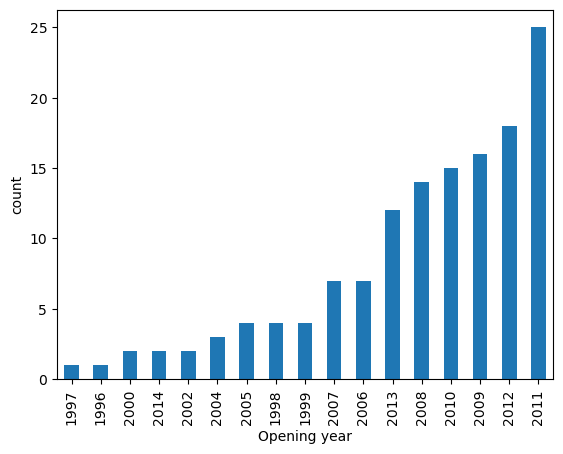

In [16]:
df.open_year.value_counts().sort_values().plot(kind='bar', xlabel='Opening year', ylabel='count')

## Target Variable: Revenue

### Summary statistics

In [17]:
df.revenue.describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

<AxesSubplot: title={'center': 'Revenue'}, ylabel='Frequency'>

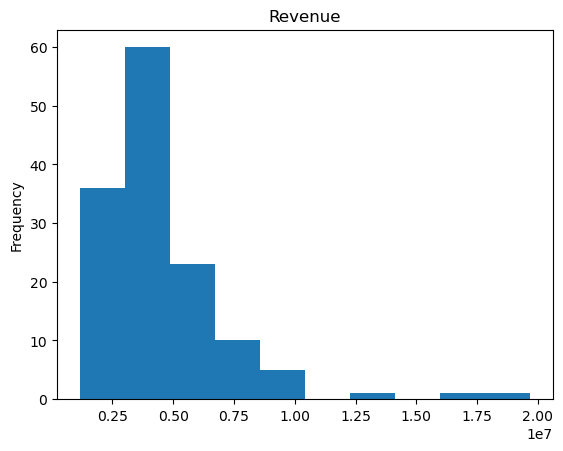

In [18]:
df.revenue.plot(kind='hist', title='Revenue')

<AxesSubplot: title={'center': 'Log10(Revenue)'}, ylabel='Frequency'>

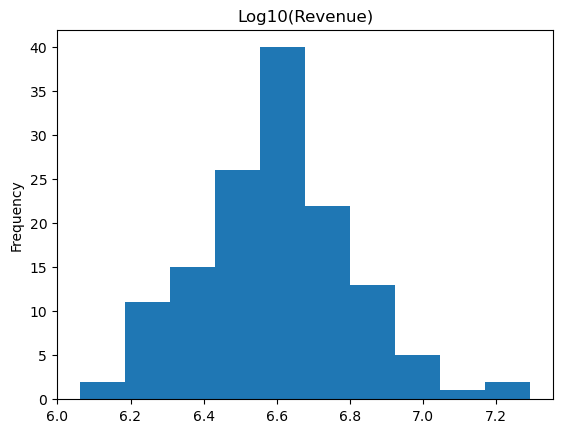

In [19]:
#Log of revenue
df.revenue.map(lambda x : np.log10(x)).plot(kind='hist', title='Log10(Revenue)')

### Comparing above-median and below-median-revenue restaurants

In [20]:
rev_med = df.revenue.median()
df['revenue_above_median'] = df.revenue.map(lambda x : int(x > rev_med))
df.head()

,open_date,city,city_group,p1,p2,p3,p4,p5,p6,p7,...,p33,p34,p35,p36,p37,revenue,city_group_fine,is_inline,open_year,revenue_above_median
Id,,,,,,,,,,,,,,,,,,,,,
0,1999-07-17,İstanbul,Big Cities,4,5.0,4.0,4.0,2,2,5,...,5,5,4,3,4,5653753.0,İstanbul,1,1999,1
1,2008-02-14,Ankara,Big Cities,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,6923131.0,Ankara,0,2008,1
2,2013-03-09,Diyarbakır,Other,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,2055379.0,other,1,2013,0
3,2012-02-02,Tokat,Other,6,4.5,6.0,6.0,4,4,10,...,6,18,12,12,6,2675511.0,other,1,2012,0
4,2009-05-09,Gaziantep,Other,3,4.0,3.0,4.0,2,2,5,...,2,3,4,3,3,4316715.0,other,1,2009,1


<AxesSubplot: title={'center': 'open_year distribution (above-median reveneue)'}, ylabel='Frequency'>

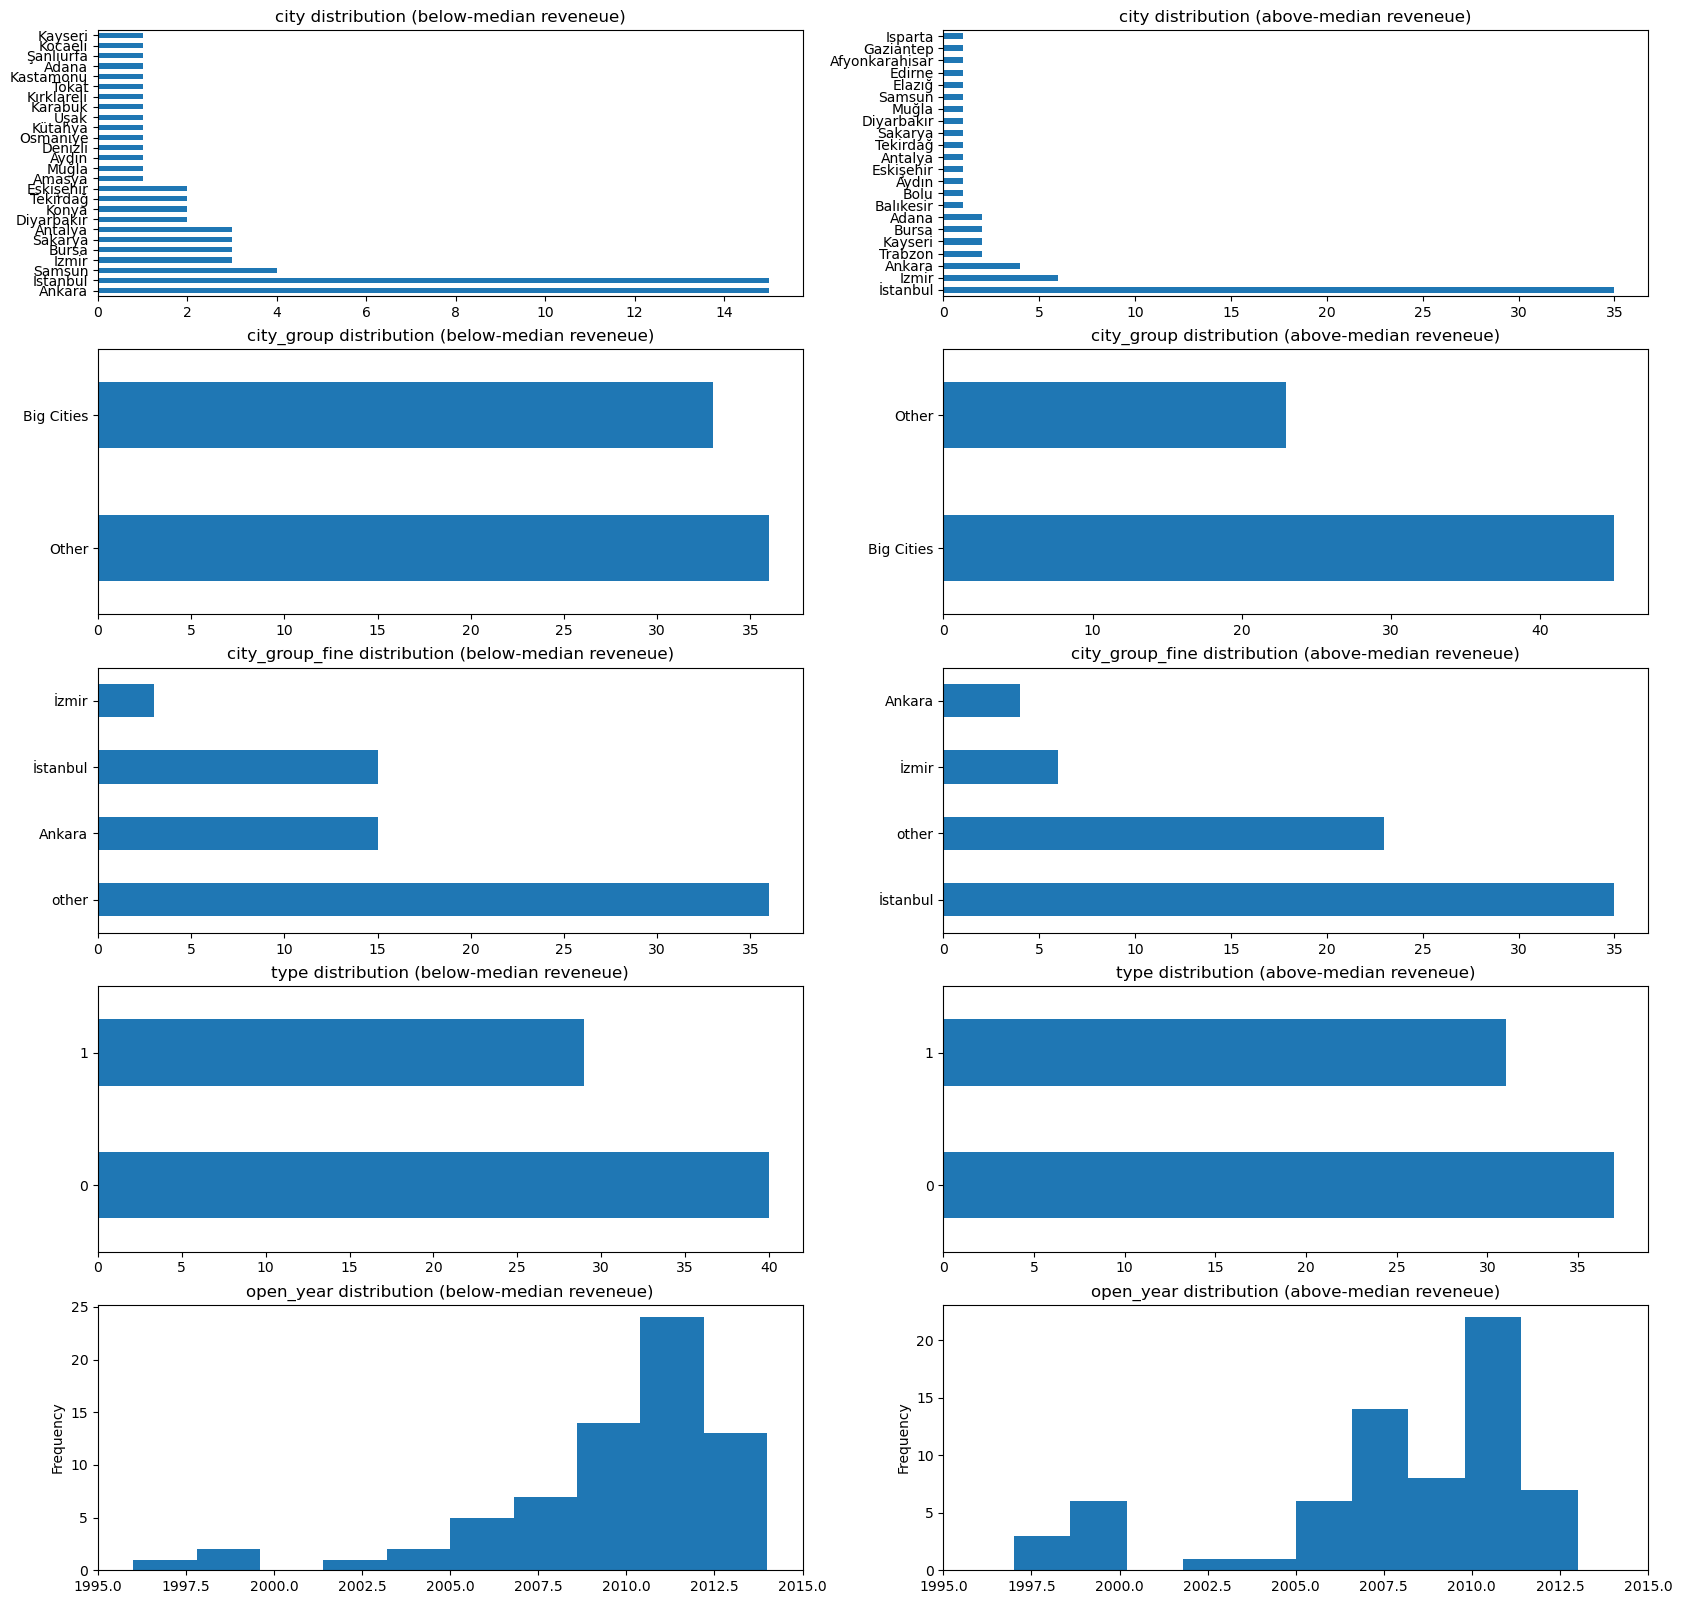

In [21]:
cats = ['city', 'city_group', 'type', 'open_year']
df_high = df[df.revenue_above_median == 1]
df_low = df[df.revenue_above_median == 0]

fig, ax = plt.subplots(5,2, figsize=(20,20))

df_low['city'].value_counts().plot(kind='barh', title='city distribution (below-median reveneue)', ax = ax[0,0])
df_high['city'].value_counts().plot(kind='barh', title='city distribution (above-median reveneue)', ax = ax[0,1])
df_low['city_group'].value_counts().plot(kind='barh', title='city_group distribution (below-median reveneue)', ax = ax[1,0])
df_high['city_group'].value_counts().plot(kind='barh', title='city_group distribution (above-median reveneue)', ax = ax[1,1])
df_low['city_group_fine'].value_counts().plot(kind='barh', title='city_group_fine distribution (below-median reveneue)', ax = ax[2,0])
df_high['city_group_fine'].value_counts().plot(kind='barh', title='city_group_fine distribution (above-median reveneue)', ax = ax[2,1])
df_low['is_inline'].value_counts().plot(kind='barh', title='type distribution (below-median reveneue)', ax = ax[3,0])
df_high['is_inline'].value_counts().plot(kind='barh', title='type distribution (above-median reveneue)', ax = ax[3,1])
df_low['open_year'].plot(kind='hist', title='open_year distribution (below-median reveneue)', ax = ax[4,0], xlim=[1995,2015])
df_high['open_year'].plot(kind='hist', title='open_year distribution (above-median reveneue)', ax = ax[4,1], xlim=[1995,2015])


This suggests that `city_group_fine` will be an important predictor of revenue, but the restaurant's `type` probably will not be.  `open_year` may or may not be useful.

## Numeric features `p1`-`p37`

In [22]:
df.head()

,open_date,city,city_group,p1,p2,p3,p4,p5,p6,p7,...,p33,p34,p35,p36,p37,revenue,city_group_fine,is_inline,open_year,revenue_above_median
Id,,,,,,,,,,,,,,,,,,,,,
0,1999-07-17,İstanbul,Big Cities,4,5.0,4.0,4.0,2,2,5,...,5,5,4,3,4,5653753.0,İstanbul,1,1999,1
1,2008-02-14,Ankara,Big Cities,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,6923131.0,Ankara,0,2008,1
2,2013-03-09,Diyarbakır,Other,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,2055379.0,other,1,2013,0
3,2012-02-02,Tokat,Other,6,4.5,6.0,6.0,4,4,10,...,6,18,12,12,6,2675511.0,other,1,2012,0
4,2009-05-09,Gaziantep,Other,3,4.0,3.0,4.0,2,2,5,...,2,3,4,3,3,4316715.0,other,1,2009,1


In [23]:
numerics = [f"p{n}" for n in range(1,38)]
print(numerics)

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37']


In [24]:
df_nums = df[numerics+['revenue']]

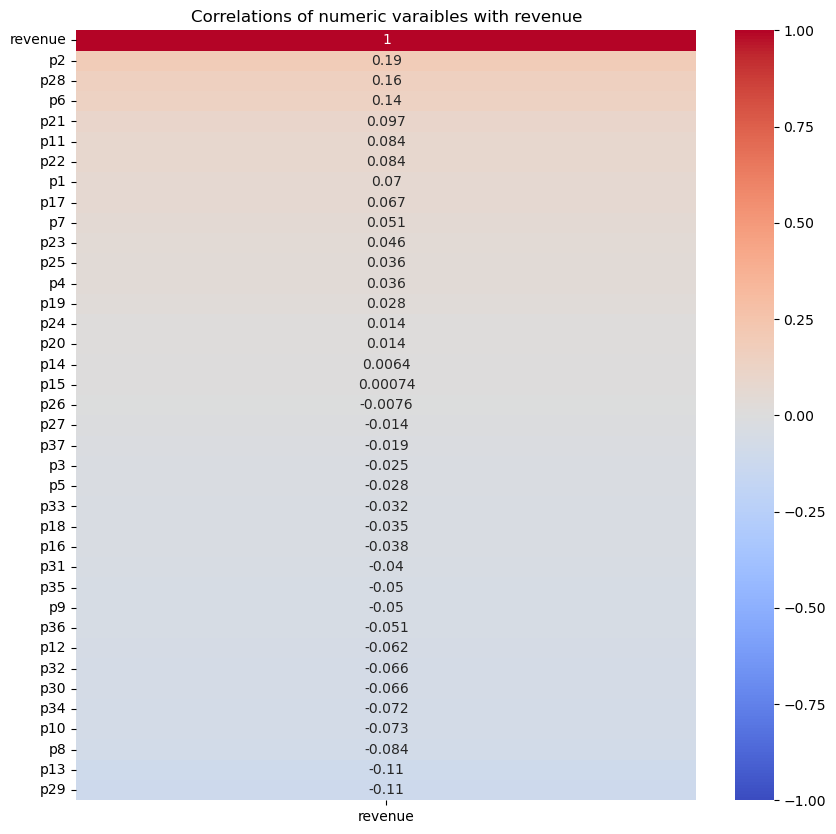

In [25]:
#Get a heatmap of correlations of numeric features with SalePrice
plt.figure(figsize=(10,10))
sns.heatmap(df_nums.corr()[['revenue']].sort_values(by = 'revenue', ascending = False),
           cmap = 'coolwarm',
           vmax = 1,
           vmin = -1,
           annot = True);
plt.title('Correlations of numeric varaibles with revenue');

So it looks like each of these numeric features is (by itself) only very weakly correlated with revenue.

## Data export

In [26]:
#Drop the non-useful city features
df = df.drop(columns=['city', 'revenue_above_median', 'open_year'])
df.head()

,open_date,city_group,p1,p2,p3,p4,p5,p6,p7,p8,...,p31,p32,p33,p34,p35,p36,p37,revenue,city_group_fine,is_inline
Id,,,,,,,,,,,,,,,,,,,,,
0,1999-07-17,Big Cities,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,İstanbul,1
1,2008-02-14,Big Cities,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,Ankara,0
2,2013-03-09,Other,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,other,1
3,2012-02-02,Other,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,other,1
4,2009-05-09,Other,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,other,1


In [27]:
#Convert "open date" to a UTC
df['open_utc'] = df['open_date'].map(lambda x : x.timestamp())

In [28]:
df = df.drop(columns='open_date')
df.head()

,city_group,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p32,p33,p34,p35,p36,p37,revenue,city_group_fine,is_inline,open_utc
Id,,,,,,,,,,,,,,,,,,,,,
0,Big Cities,4,5.0,4.0,4.0,2,2,5,4,5,...,4,5,5,4,3,4,5653753.0,İstanbul,1,9.321696e+08
1,Big Cities,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,6923131.0,Ankara,0,1.202947e+09
2,Other,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,2055379.0,other,1,1.362787e+09
3,Other,6,4.5,6.0,6.0,4,4,10,8,10,...,10,6,18,12,12,6,2675511.0,other,1,1.328141e+09
4,Other,3,4.0,3.0,4.0,2,2,5,5,5,...,3,2,3,4,3,3,4316715.0,other,1,1.241827e+09


In [29]:
#Convert city_group to a binary
df['is_big_city'] = df['city_group'].map(lambda x : 1 if x=='Big Cities' else 0)
df = df.drop(columns='city_group')
df.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p33,p34,p35,p36,p37,revenue,city_group_fine,is_inline,open_utc,is_big_city
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,5,4,3,4,5653753.0,İstanbul,1,9.321696e+08,1
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,6923131.0,Ankara,0,1.202947e+09,1
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,2055379.0,other,1,1.362787e+09,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,6,18,12,12,6,2675511.0,other,1,1.328141e+09,0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,2,3,4,3,3,4316715.0,other,1,1.241827e+09,0


In [30]:
df.to_csv('../data/train_prepared.csv', index_label='Id')

### If we want to do a Kaggle submission, then we need to do the same transform to the test data.